In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### F1-Score的基本性质

In [2]:
def harmonic_mean(A, B):
        return 2 * A * B/(A + B)

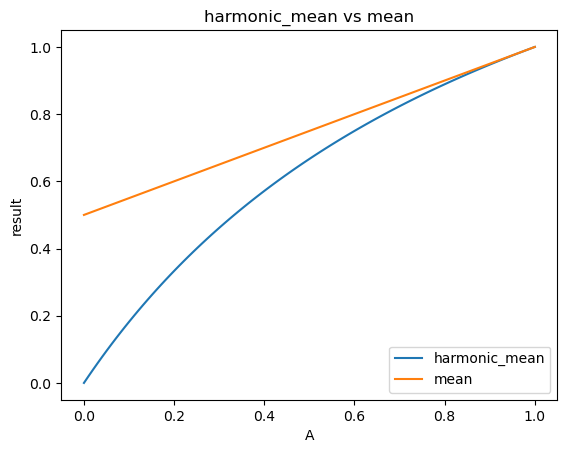

In [3]:
A = np.linspace(0, 1, 100)
B = np.ones(shape = A.shape)

plt.plot(A, harmonic_mean(A, B), label = 'harmonic_mean')
plt.plot(A, (A+B)/2, label = 'mean')
plt.xlabel('A')
plt.ylabel('result')
plt.title('harmonic_mean vs mean')
plt.legend(loc = 4)